# Machine Learning Development project

Mahamat HAMID & Yassine KADDAMI

## I- Kidney Desease Dataset

Let's import and visualize the dataset

In [1]:
from utils import *

kidney_df = pd.read_csv("datasets\kidney_disease.csv")
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### 1 - Data preprocessing and training preparation

Here, we first **preprocess data**:
* we convert data into its appropriate type
* we clean the data by removing unusual carachters, and removing Nan values
* we one_hot encode categorical features

Then, we **prepare the preprocessed data for training**:
* we split it into train ad test datasets
* we normalize and handle the skewness of the datasets. We choosed to do this task here because it has to be done after data splitting to perform the same scaler, used on the train dataset, on the test dataset
* We split train dataset for cross validation 

In [2]:
preprocessed_kd_df = preprocessing(kidney_df)
train_kd_df, test_kd_df, cross_val_split_kd = prepare_for_training(preprocessed_kd_df)
train_kd_df.head()

c:\Users\kaddy\anaconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,...,appet,pe,ane,classification,rbc_abnormal,rbc_normal,rbc_unknown,pc_abnormal,pc_normal,pc_unknown
3,-0.167255,-0.440578,-2.294927,1.222441,-0.474048,1,0,-0.449452,0.012088,0.157880,...,1,1,1,0,0.0,1.0,0.0,1.0,0.0,0.0
18,0.524090,1.728422,1.391616,-1.569490,1.272284,0,0,1.535648,-0.872509,-0.343293,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0
202,1.561109,-1.163578,-0.007808,0.004968,-0.474048,0,0,-0.490241,0.322817,0.004840,...,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
250,-0.628152,0.282422,1.391616,-1.569490,-0.474048,0,0,-0.136731,-2.665816,-0.369664,...,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0
274,-1.838007,0.282422,0.469980,-1.569490,-0.474048,0,0,-0.585417,-1.090838,-0.513083,...,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0


#### 2 - Models training

Here, we train models using 5 different binary classification methods. For each method, we use cross validation along with grid search to find best hyperparameters. For some of the methods we use L1 regularization for feature selection.

KNN model

In [3]:
Knn_trainer_kd = KNN_trainer()
model_training(Knn_trainer_kd, train_kd_df, cross_val_split_kd, "classification")

Median cross validation score increased from -inf to 0.9823693164243736 with n_neighbors=1. Saving model... 
Median cross validation score increased from 0.9823693164243736 to 0.9836065573770492 with n_neighbors=2. Saving model... 


DecisionTree model

In [4]:
decisiontree_trainer_kd = DecisionTree_trainer()
model_training(decisiontree_trainer_kd, train_kd_df, cross_val_split_kd, "classification")

Median cross validation score increased from -inf to 0.8942797244684038 with max_depth=1. Saving model... 
Median cross validation score increased from 0.8942797244684038 to 0.9425058158856763 with max_depth=2. Saving model... 


XGBoost model

In [5]:
XG_boost_trainer_kd = XG_boost_trainer()
model_training(XG_boost_trainer_kd, train_kd_df, cross_val_split_kd, "classification")

Median cross validation score increased from -inf to 0.9905660377358491 with learning_rate=0.1, max_depth=3, n_estimators=50. Saving model... 
Median cross validation score increased from 0.9905660377358491 to 1.0 with learning_rate=0.1, max_depth=3, n_estimators=100. Saving model... 


Logistic Regression model

In [6]:
input_size_kd = train_kd_df.shape[1]
logistic_reg_trainer_kd = logistic_regression_trainer(input_size_kd - 1)
model_training(logistic_reg_trainer_kd, train_kd_df,cross_val_split_kd,  "classification")

Median cross validation score increased from -inf to 1.0 with learning_rate=0.1, n_epochs=100, L1_regularization_coeff=0. Saving model... 


MLP model

In [7]:
MLP_trainer_kd = MLP_trainer(input_size_kd - 1)
model_training(MLP_trainer_kd, train_kd_df,cross_val_split_kd,  "classification")

Median cross validation score increased from -inf to 1.0 with learning_rate=0.1, n_epochs=100, L1_regularization_coeff=0. Saving model... 


#### 3- Models Testing

Lets now test the different models and compare the results. We choose to use the F1 score to take into account recall and precision on the same time and avoid biases resulting from imbalanced data. 

                     Test Score
KNN                    0.962963
Decision_Tree          0.982456
XG_boost               0.982456
Logistic Regression    0.987446
MLP                    0.987446


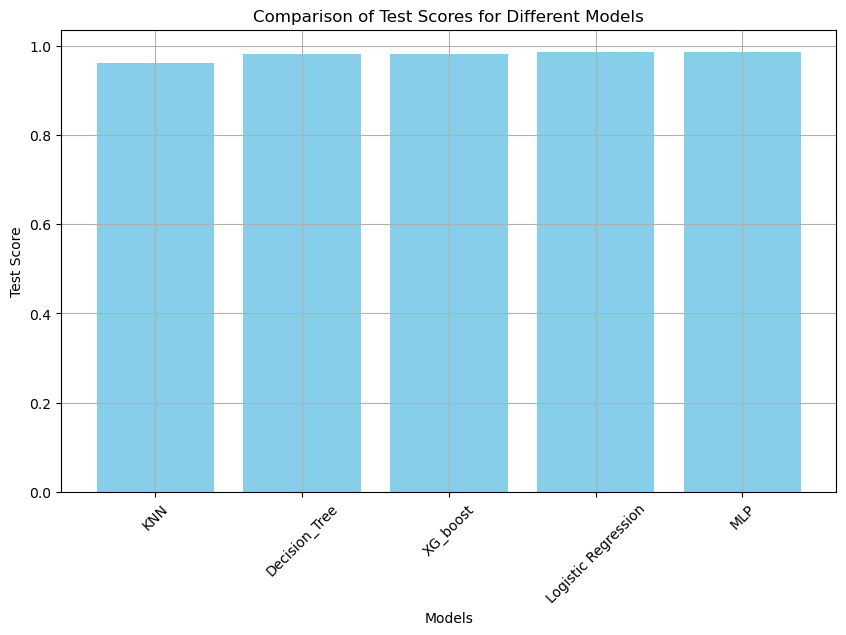

In [8]:
models_kd = [Knn_trainer_kd, decisiontree_trainer_kd, XG_boost_trainer_kd, logistic_reg_trainer_kd, MLP_trainer_kd]
compare_results(models_kd, test_kd_df, "classification")

We can see the best scores are obtained using the logistic regression method and the MLP method with a F1 score of 0.99. The KNN method doesn't seem to perform well on this dataset compared to other methods (score of 0.96). On the other hand, XG_boost and the decision tree algorithms have a similar performance (score of 0.98) which is close to the best score.

We can explain that by the fact that KNN is very sensitive to noisy data and to sparse data compared to other methods due to its distance based nature. That why for this dataset where the data has multiple features it may be more difficult for KNN to achieve perfect scores.

Furthermore, we can see that the MLP didn't perform well compared to Logistic regression, it shows that it didn't catch some non linearities relevant for making the decision.

I would have chosen the logistic regression method for this dataset due to its high score, the approximately linear nature of the boundary, and the simplicity of the algorithm compared to the MLP.

## II- Banknote Authentification Dataset

Now lets test the same workflow using the same functions on the Banknote authentification dataset.

In [9]:
banknote_df = pd.read_csv("datasets\data_banknote_authentication.txt", header=None)
banknote_df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### 1 - Data preprocessing and training preparation

In [18]:
banknote_preprocessed_df = preprocessing(banknote_df)
train_banknote_df, test_banknote_df, cross_val_split_banknote = prepare_for_training(banknote_preprocessed_df)
column_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'target']  # Replace with your column names
train_banknote_df.columns = column_names
test_banknote_df.columns = column_names
train_banknote_df.head()

,Feature1,Feature2,Feature3,Feature4,target
529,-0.639156,1.805580,-0.188365,-3.050968,0
243,0.821889,0.852399,-0.594078,0.603455,0
1309,-1.657033,-1.633283,2.383862,-0.342355,1
664,1.728861,0.328631,-0.748077,1.084449,0
745,0.113973,0.205992,0.325092,0.534656,0


#### 2 - Models training

KNN model

In [11]:
Knn_trainer_bn = KNN_trainer()
model_training(Knn_trainer_bn, train_banknote_df, cross_val_split_banknote, "target")

Median cross validation score increased from -inf to 0.9979591836734694 with n_neighbors=1. Saving model... 


DecisionTree model

In [12]:
decisiontree_trainer_bn = DecisionTree_trainer()
model_training(decisiontree_trainer_bn, train_banknote_df, cross_val_split_banknote, "target")

Median cross validation score increased from -inf to 0.8571428571428572 with max_depth=1. Saving model... 
Median cross validation score increased from 0.8571428571428572 to 0.9089301503094607 with max_depth=2. Saving model... 
Median cross validation score increased from 0.9089301503094607 to 0.9319773793458004 with max_depth=3. Saving model... 
Median cross validation score increased from 0.9319773793458004 to 0.9561771561771562 with max_depth=4. Saving model... 
Median cross validation score increased from 0.9561771561771562 to 0.959221376866361 with max_depth=5. Saving model... 
Median cross validation score increased from 0.959221376866361 to 0.9739801508023458 with max_depth=6. Saving model... 
Median cross validation score increased from 0.9739801508023458 to 0.9760099401044985 with max_depth=9. Saving model... 


XGboost model

In [13]:
XG_boost_trainer_bn = XG_boost_trainer()
model_training(XG_boost_trainer_bn, train_banknote_df, cross_val_split_banknote, "target")

Median cross validation score increased from -inf to 0.9853905160390515 with learning_rate=0.1, max_depth=3, n_estimators=50. Saving model... 
Median cross validation score increased from 0.9853905160390515 to 0.9899880548220797 with learning_rate=0.1, max_depth=3, n_estimators=100. Saving model... 
Median cross validation score increased from 0.9899880548220797 to 0.9917478354978355 with learning_rate=0.1, max_depth=3, n_estimators=200. Saving model... 
Median cross validation score increased from 0.9917478354978355 to 0.9920798898071626 with learning_rate=0.1, max_depth=5, n_estimators=200. Saving model... 


Logistic Regression model

In [14]:
input_size_bn = train_banknote_df.shape[1]
logistic_reg_trainer_bn = logistic_regression_trainer(input_size_bn - 1)
model_training(logistic_reg_trainer_bn, train_banknote_df,cross_val_split_banknote,  "target")

Median cross validation score increased from -inf to 0.9872337503676896 with learning_rate=0.1, n_epochs=100, L1_regularization_coeff=0. Saving model... 
Median cross validation score increased from 0.9872337503676896 to 0.9890575704991673 with learning_rate=0.1, n_epochs=150, L1_regularization_coeff=0. Saving model... 


MLP model

In [15]:
MLP_trainer_bn = MLP_trainer(input_size_bn - 1)
model_training(MLP_trainer_bn, train_banknote_df,cross_val_split_banknote,  "target")

Median cross validation score increased from -inf to 1.0 with learning_rate=0.1, n_epochs=100, L1_regularization_coeff=0. Saving model... 


#### 3- Models Testing

                     Test Score
KNN                    1.000000
Decision_Tree          0.980080
XG_boost               0.992063
Logistic Regression    0.985455
MLP                    1.000000


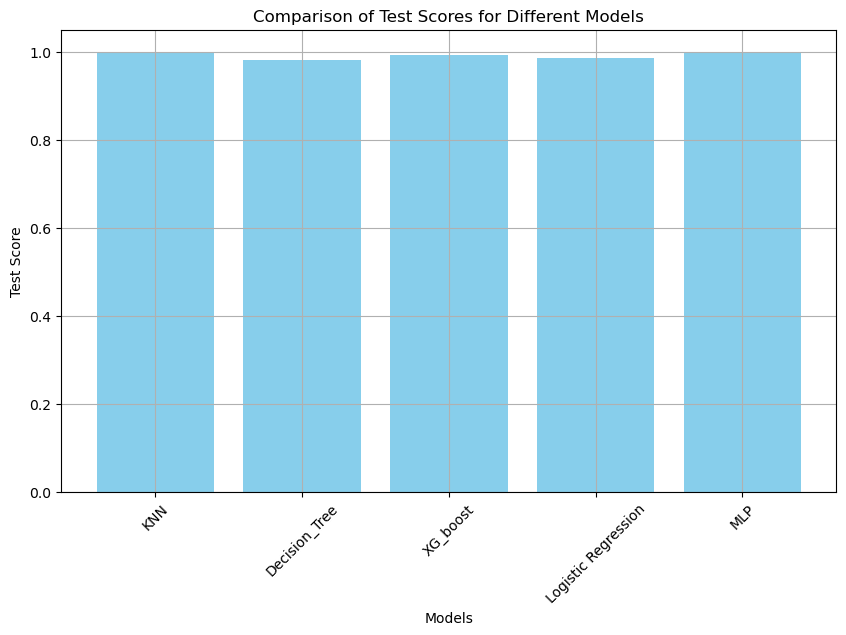

In [21]:
models_bn = [Knn_trainer_bn, decisiontree_trainer_bn, XG_boost_trainer_bn, logistic_reg_trainer_bn, MLP_trainer_bn]
compare_results(models_bn, test_banknote_df, "target")

We can see that the KNN performed very well for this dataset along with the MLP method with a perfect f1 score of 1. The XG boost method comes 2nd with 0.99. The Decision Tree methods performed this time less than the Xg boost with a score of 0.98.

We can explain these results by two main points:
* The data banknote dataset is complicated and has more intricate boundaries compared to the kidney dataset , that's why the XG_boost performed better than Decisioon Trees on this dataset.
* This time the linear assumption of logistic regression did'nt work as well as other models like KNN or MLP, which shows that the boundary this time is not linear and that there are more complex relationships to capture. It's also good to notice that the banknote dataset has very few features than the kidney dataset, that's why KNN have performed better in this case. 

According to the results, I would have chosen the KNN method for this dataset because it's way more simple than an MLP and its able to catch non linear relationships in this dataset.

### III- Good Programming Practices

We adhered to **best practices** throughout our project, ensuring our code was **robust and maintainable**. With **Git**, we employed descriptive commit messages, enabling collaboration and providing a clear history of changes. Our code structure was modular: we used **object-oriented programming** with an abstract Trainer class that can be reused to try the workflow on a different binary classification method. Every function was well-documented, offering **clear descriptions**, argument details, and return value explanations. We also made sure to **facilitate code comprehension** by adding commentaries. We also included a **unit test**, verifying the correctness of the preprocess function. Moreover, we used **Anaconda** for environment management to ensure an **isolated environment** for our project. These practices collectively fortified the quality, readability, and reliability of our codebase.